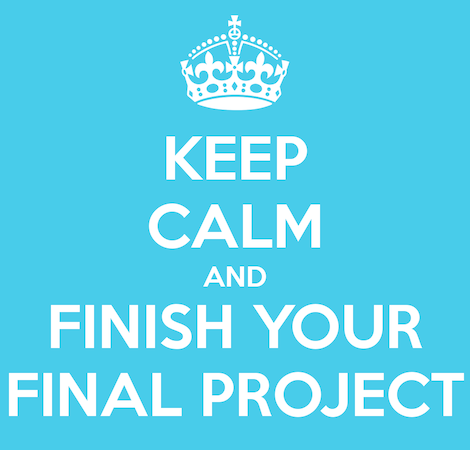

# Overview

<p style="line-height:1.75;font-size:16px">
It's time to put your skills to the test and take on a real-world data science project. You are given a dataset of ad impressions for Android users for a particular ad. Each line represents one impression for that ad and includes details such as timestamp, device, mobile carrier and more.

In [1]:
import pandas as pd

data = pd.read_csv('data/android_bids_us.csv')
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0


<p style="line-height:1.75;font-size:16px">
Your task is to predict if a user will click or not on the ad.

# Guidelines

<p style="line-height:1.75;font-size:16px">
You will have two weeks to complete this project during which we will have two half-days dedicated to this. Besides giving you the chance to gain experience and showcase what you've learned, this project is intended to give you a glimpse into the actual process and work of a data scientist.<br> Before we talk about the task itself, here are some important guidelines:<br>
1\. <b>Show your work</b> - if you've tried something and it didn't work that's fine, don't delete it. Data science is an iterative process and we can learn a lot from what didn't work. Explain what didn't work and the reasons for it.<br>
2\. <b>Explain your work</b> - don't just write a bunch of code and the final output. Explain the motivation for each step you take, describe the results you got and what they mean. <br>
3\. <b>Use visualizations</b> - while exploring the data or when trying to convey an important message, use plots to help you. That being said, don't force yourself to add plots if they're not really needed.<br>
4\. <b>Plan ahead</b> - if you start working on the project near the submission date you will have less time to ask questions and come up with ideas.<br>
5\. <b>Google is your friend</b> - while we've learned the basic skills required to complete this project, there are many other techniques and ideas we didn't have time to talk about. Don't limit yourself to the lessons, search for similar problems and how to approach them, exchange ideas with colleagues and don't be afraid to try new ideas. <br>
6\. <b>It's not about the score</b> - while reaching a good prediction score is nice, it's not the main purpose of this project. Use this project to show your understanding and reasoning as well as your technical skills.<br>
7\. <b>Write clean code</b> - make sure you write code that is easy to read and understand. Give meaningful names, use functions, add comments if needed.<br>
8\. <b>Test before submission</b> - your work should be submitted as a Jupyter Notebook. Before submitting it, make sure you run it from start to finish and verify that there are no errors.<br>
9\. <b>Enjoy it</b> - try to have fun working on this, be curious, look for interesting insights and take pride in completing a real-world project end-to-end.

# Tips

<p style="line-height:1.75;font-size:16px">
1\. Since the data is time sensitive, split it so that the test data will be the last month of data and the training data will be anything that came before that.<br>
2\. `play_apps.zip` is data from Google Play about the various apps in the dataset. You can use this to augment the impressions dataset.<br>
3\. The data is collected from customers in the US (multiple timezones).<br>

In [2]:
from zipfile import ZipFile
import pickle

app_details = ZipFile("data/play_apps.zip")
app_file = 'play_apps/a008.com.fc2.blog.androidkaihatu.datecamera2'
app = pickle.loads(app_details.read(app_file))
app

{'title': 'DateCamera2 (Auto timestamp)',
 'icon': 'https://lh3.googleusercontent.com/BvVD8_9aN_-wrqP7WTeF4u40MocWdbNoxxlU_HR1GnRT9SGxZmV3JEQbjCaRVj5880e3',
 'screenshots': ['https://lh3.googleusercontent.com/_CJBocPzM9CF2CPrnnvbEX5-9NllpY2AsqB9e8hyoDDwUIC_dv95Q7dehq8Tu7KKX1c=w720-h310-rw',
  'https://lh3.googleusercontent.com/zQUynoLG5VJd2dV4leUNCvqehyDMVbBVEiqWdKpL35CqkbxDsatCeGOuEviAGTEvHMI=w720-h310-rw',
  'https://lh3.googleusercontent.com/u7Yg9yiCLx9Jou2CqfUr0I1w1I08km_n0I-VCC7Tc8IE-lmqUtHfCemPChNnaO5n6dk=w720-h310-rw',
  'https://lh3.googleusercontent.com/KPcyVSjtX3dvVy8WP2G67U8G8xK2IQHhqWa0nnlPevCr-BaQm31t46StfEs96UTFtZBt=w720-h310-rw',
  'https://lh3.googleusercontent.com/dgUVp1C2nbIcj5XOKLGidzPkvBmWKwXzCxwuHwhhMkn7s8rve6gF-NkTHuuInr0GBA=w720-h310-rw',
  'https://lh3.googleusercontent.com/M0YDP301kQu6WsQxt9fZfsxGRumFrWZnTyPGNlcjeWDbLufl5CC4vDm1Z5F9SUiCR8I=w720-h310-rw',
  'https://lh3.googleusercontent.com/nWRsvYhsHsdmP3W7YC9L9J-vA8prbPIbWVi7mERMU_0jzI_92lU7mYd6gCajORcHBw=w720

<p style="line-height:1.75;font-size:16px">
Before any action, lets split the to train-test by date.<br>
To do that we should encode 'utc_time' as local time by 'user_state'. <br>
We can use 'us' library to convert 'state code' up to 'time zone':

In [3]:
#!python -m pip install us

In [4]:
import us

data['time_zone'] = data["user_state"].apply(lambda state: us.states.lookup(state).time_zones[0])
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,time_zone
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0,America/Chicago
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0,America/Chicago
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0,America/Chicago
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0,America/Chicago
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0,America/New_York


<p style="line-height:1.75;font-size:16px">
Now we can use 'Timestamp' method of pandas to apply local time by state figured from 'utc_time':

In [5]:
data['local_time'] = data.apply(lambda row: pd.Timestamp(row['utc_time'], unit='ms', tz=row['time_zone']), axis=1)

In [6]:
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,time_zone,local_time
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0,America/Chicago,2018-09-08 17:05:31.894000-05:00
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0,America/Chicago,2018-09-08 17:06:03.932000-05:00
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0,America/Chicago,2018-09-08 17:06:26.908000-05:00
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0,America/Chicago,2018-09-08 17:06:45.023000-05:00
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0,America/New_York,2018-09-08 18:07:23.458000-04:00


<p style="line-height:1.75;font-size:16px">
Drop duplicates of bidid. Also drop column 'marketplace':

In [7]:
data.drop(['marketplace'], axis=1, inplace=True)

In [8]:
data.sort_values(by=['bidid', 'click']).drop_duplicates(subset=['bidid'], keep='last', inplace=True)
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,click,time_zone,local_time
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,0,America/Chicago,2018-09-08 17:05:31.894000-05:00
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,0,America/Chicago,2018-09-08 17:06:03.932000-05:00
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,0,America/Chicago,2018-09-08 17:06:26.908000-05:00
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,0,America/Chicago,2018-09-08 17:06:45.023000-05:00
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,0,America/New_York,2018-09-08 18:07:23.458000-04:00


<p style="line-height:1.75;font-size:16px">
Now lets seperate the data to < train , test > by time before exploring

In [9]:
data.sort_values(by=['local_time'])

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,click,time_zone,local_time
571122,450a89d7-05b6-49b8-a330-3b1140a45632,1533578420974,com.kiloo.subwaysurf,NE,Verizon Wireless,NaN,NaN,8.0.0,1480,720,0,America/Chicago,2018-08-06 13:00:20.974000-05:00
584600,906bc987-e22b-4b3b-855a-bf07c48c131f,1533578427357,com.kiloo.subwaysurf,CT,Verizon Wireless,NaN,NaN,7.1.1,960,540,0,America/New_York,2018-08-06 14:00:27.357000-04:00
597313,c1ccc24f-7849-42b4-a177-40c9f675843d,1533578443707,com.kiloo.subwaysurf,CA,AT&T U-verse,NaN,NaN,7.1.1,960,540,0,America/Los_Angeles,2018-08-06 11:00:43.707000-07:00
597314,822fae69-f354-4ee1-830b-ebaa083643d6,1533578444037,com.gramgames.tenten,MI,Sprint PCS,NaN,NaN,8.0.0,1280,720,0,America/New_York,2018-08-06 14:00:44.037000-04:00
593662,e70fac8b-37f8-45d9-bcf8-2ff34a03a1a4,1533578448733,com.kiloo.subwaysurf,CA,AT&T Wireless,NaN,NaN,6.0.1,800,480,0,America/Los_Angeles,2018-08-06 11:00:48.733000-07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280433,8dab0d6f-94a8-4946-83a5-543b9c399257,1542630279877,com.fivefpsgames.gta.grandgangcity,TX,AT&T Wireless,ZTE,Z718TL,6.0.1,480,800,0,America/Chicago,2018-11-19 06:24:39.877000-06:00
283701,090eff02-ff14-4838-83e2-f1f29b050713,1542630283308,com.mavis.slidey,CO,CenturyLink,LG,MP260,7.0,1280,720,0,America/Denver,2018-11-19 05:24:43.308000-07:00
286129,3b6629e8-7b67-4302-8f8b-c9ce6cd83689,1542630285833,br.com.tapps.zombieevolution,MI,T-Mobile USA,Samsung,SM-N920T,7.0,1920,1080,0,America/New_York,2018-11-19 07:24:45.833000-05:00
283702,ed9484b0-bc66-47ca-8c91-a04b278e4714,1542630287748,com.notabasement.mangarock.android.lotus,MD,Verizon Fios,Samsung,SM-J337A,8.0.0,1280,720,0,America/New_York,2018-11-19 07:24:47.748000-05:00


<p style="line-height:1.75;font-size:16px">
Seperator is 1 month back from the last 'local_time'

In [10]:
sprt_time = pd.Timestamp('2018-11-1 07:24:53.941000-05:00')
train = data[data['local_time'] <= sprt_time]
test = data[data['local_time'] > sprt_time]
train.sample(4)

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,click,time_zone,local_time
381942,3dacf5ce-87c9-489c-b312-b5e78037edc4,1537820106209,com.RocketGames.TropicanaLasVegas,NC,T-Mobile USA,HTC,U11 life,8.1.0,720,1280,1,America/New_York,2018-09-24 16:15:06.209000-04:00
1487241,d5e29f7b-0f35-4a4e-95f2-5a8de3cb1e39,1535058147083,com.verydice,OK,Sallisaw Municipal Authority,NaN,NaN,6.0.1,1280,720,0,America/Chicago,2018-08-23 16:02:27.083000-05:00
2502444,468c78af-3dbe-451e-832c-c4d0b45187af,1538273327883,com.spacegame.solitaire.basic,IL,Sprint PCS,Samsung,SM-G960U,8.0.0,1920,1080,0,America/Chicago,2018-09-29 21:08:47.883000-05:00
2994032,9e718296-9f76-4911-8107-33842cd9df8d,1535731755380,com.FDGEntertainment.redball4.gp,IL,Comcast Cable,NaN,NaN,7.0,720,1280,0,America/Chicago,2018-08-31 11:09:15.380000-05:00


# Understanding the data

<p style="line-height:1.75;font-size:16px">
For preprocessing we should exam the following parameters -<br>
- How many rows and columns in data table<br>
- What is the columns type<br>
- What is the max\min value for every feature<br>
- Where there are missing values as NA<br>
- Data is balanced?<br>
- Scaling the data

In [11]:
train.shape

(2692110, 13)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2692110 entries, 0 to 3148818
Data columns (total 13 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   bidid          object
 1   utc_time       int64 
 2   app_id         object
 3   user_state     object
 4   user_isp       object
 5   device_maker   object
 6   device_model   object
 7   device_osv     object
 8   device_height  int64 
 9   device_width   int64 
 10  click          int64 
 11  time_zone      object
 12  local_time     object
dtypes: int64(4), object(9)
memory usage: 287.5+ MB


<p style="line-height:1.75;font-size:16px">
As the 'info' shown, there are many features with type 'object'.<br>
To display the integers type features we can use 'describe':

In [13]:
train.describe()

,utc_time,device_height,device_width,click
count,2.692110e+06,2.692110e+06,2.692110e+06,2.692110e+06
mean,1.537738e+12,1.200772e+03,1.155966e+03,6.693003e-02
std,1.952719e+09,5.223336e+02,4.564782e+02,2.499008e-01
min,1.533578e+12,1.400000e+01,1.400000e+01,0.000000e+00
25%,1.536114e+12,7.200000e+02,7.200000e+02,0.000000e+00
50%,1.538090e+12,1.080000e+03,1.080000e+03,0.000000e+00
75%,1.539225e+12,1.280000e+03,1.280000e+03,0.000000e+00
max,1.541075e+12,3.120000e+03,3.120000e+03,1.000000e+00


<p style="line-height:1.75;font-size:16px">
After preprocessing and retyping the features, we should run 'describe' function again.

<p style="line-height:1.75;font-size:16px">
We probably can drop columns with many missing values:

In [14]:
train.isna().sum()

bidid                 0
utc_time              0
app_id                0
user_state            0
user_isp             39
device_maker     937393
device_model     937247
device_osv            0
device_height         0
device_width          0
click                 0
time_zone             0
local_time            0
dtype: int64

<p style="line-height:1.75;font-size:16px">
We will test a change to fill NA values with most common value, lets verify result for 'device_maker' and 'device_model': 

In [15]:
print(train.device_maker.value_counts(dropna=False))
print('\n'+'~'*40+'\n')
print(train.device_model.value_counts(dropna=False))

NaN                 937393
Samsung             734606
LG                  496035
Motorola            171454
ZTE                 152701
                     ...  
InFocus                  1
QUBE ELECTRONICS         1
Fly                      1
MygPad                   1
Quantum                  1
Name: device_maker, Length: 248, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

NaN           937247
SM-J327T1      77343
LM-X210(G)     76442
Moto E4        66293
MP260          55838
               ...  
Blade A6           1
1801               1
Y71                1
TangoTab           1
JMM-AL00           1
Name: device_model, Length: 2157, dtype: int64


<AxesSubplot:xlabel='device_maker', ylabel='count'>

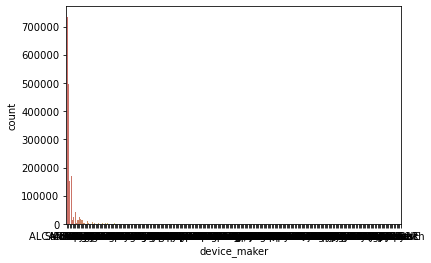

In [16]:
import seaborn as sns
sns.countplot(x='device_maker', data=train, palette='hls')

<AxesSubplot:xlabel='device_model', ylabel='count'>

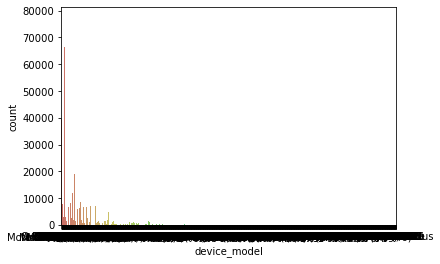

In [17]:
sns.countplot(x='device_model', data=train, palette='hls')

<p style="line-height:1.75;font-size:16px">
We can see there are many minor values apears only once or couple of times.<br>
'Samsung' is most common value by far (after na value). Before we fill all NA with value as 'Samsung', lets check how many options exist:

In [18]:
pd.unique(train.device_maker)

array([nan, 'Samsung', 'LG', 'ZTE', 'Motorola', 'Coolpad', 'HTC',
       'ALCATEL', 'Sony', 'Huawei', 'Google', 'T-Mobile',
       'ALCATEL ONE TOUCH', 'OZing', 'RCA', 'Razer', 'Asus', 'Kakatech',
       'Unimax', 'Hyundai', 'ANS', 'Lenovo', 'verykool', 'Xiaomi', 'BLU',
       'Azumi', 'LiteTEL', 'Kyocera', 'Infinix', 'Verizon', 'Sheffield',
       'Cricket', 'Nubia', 'Insignia', 'Vortex', 'FiGO', 'Oneplus',
       'Vivo', 'Hisense', 'Simbans', 'Essential', 'BlackBerry', 'LANIX',
       'Smartab', 'Nextbit', 'OPPO', 'General Mobile', 'HMD Global',
       'POSH', 'Ematic', 'NuVision', 'MygPad', 'Barnes and Noble',
       'CUBOT', 'NUU Mobile', 'Unnecto', 'Unihertz', 'LeTV', 'DoCoMo',
       'nabi', 'Wiko', 'Exmobile', 'Ergo', 'Tecno', 'DigiLand',
       'NextBook', 'Advan', 'Citycall', 'vernee', 'DOOGEE', 'TCL',
       'Azpen', 'LAVA', 'Digicel', 'IVIEW', 'Proscan', 'Sky', 'KOMU',
       'Amazon', 'Acer', 'M4Tel', 'Ulefone', 'Ipro', 'Blackview', 'KODAK',
       'NVIDIA', 'Supersonic', '

<p style="line-height:1.75;font-size:16px">
Since there are many values, and most of device_maker and device_model values is NaN, Specify the NaN values as 'Samsung' will be wrong.<br>
Lets see how many 'device_maker' single values:

In [19]:
train.device_maker.value_counts().value_counts()

1      51
2      22
3      15
4      12
6       7
       ..
127     1
475     1
133     1
43      1
66      1
Name: device_maker, Length: 98, dtype: int64

<p style="line-height:1.75;font-size:16px">
There are 51 single values, 20 duplicate value and go on.<br>
Lets try to union some values as type 'other' to simplify the data.
If we will union the values apears under 40 times we get 1331 items in category 'other'

In [20]:
train.device_maker.value_counts().loc[lambda x: x < 40].sum()

1416

<p style="line-height:1.75;font-size:16px">
Increasing these thresholds to 6000 (because union 1332 device_makers out of 2 milion lines is too little):

In [21]:
train.device_maker.value_counts().loc[lambda x: x < 6000].sum()

46080

<p style="line-height:1.75;font-size:16px">
Before we drop those columns, we can renamed all those little values as 'other':

In [22]:
train.device_maker.value_counts().loc[lambda x: x < 60000]

ALCATEL             41334
HTC                 24889
Google              22896
T-Mobile            15971
Coolpad             13753
                    ...  
InFocus                 1
QUBE ELECTRONICS        1
Quantum                 1
Fly                     1
ARK                     1
Name: device_maker, Length: 243, dtype: int64

In [23]:
from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='other')
train['device_maker'] = imp.fit_transform(train['device_maker'].values.reshape(-1,1))

<ipython-input-23-9be5e9b3e06e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_maker'] = imp.fit_transform(train['device_maker'].values.reshape(-1,1))


<AxesSubplot:xlabel='device_maker', ylabel='count'>

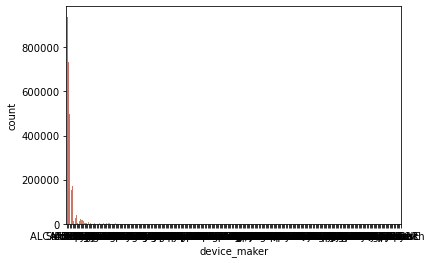

In [24]:
sns.countplot(x='device_maker', data=train, palette='hls')

<p style="line-height:1.75;font-size:16px">
As we can see, NaN value now revalued as 'other' and nothing changed. <br>
Lets revalue all minor values to 'other':

In [25]:
train['device_maker'].loc[train['device_maker'].value_counts()[train['device_maker']].values < 6000] = 'other'

C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-25-a8882049da42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_maker'].loc[train['device_maker'].value_counts()[train['device_maker']].values < 6000] = 'other'


In [26]:
pd.unique(train.device_maker)

array(['other', 'Samsung', 'LG', 'ZTE', 'Motorola', 'Coolpad', 'HTC',
       'ALCATEL', 'Huawei', 'Google', 'T-Mobile', 'ALCATEL ONE TOUCH',
       'Asus'], dtype=object)

<AxesSubplot:xlabel='device_maker', ylabel='count'>

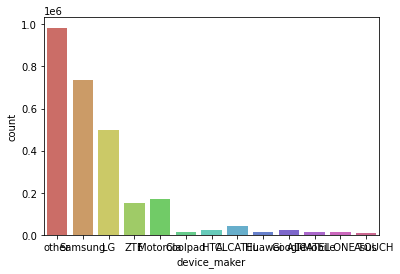

In [27]:
sns.countplot(x='device_maker', data=train, palette='hls')

<p style="line-height:1.75;font-size:16px">
Lets to it for all values below 60000 apears:

In [28]:
train['device_maker'].loc[train['device_maker'].value_counts()[train['device_maker']].values < 60000] = 'other'

C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-28-42aa3fba5837>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_maker'].loc[train['device_maker'].value_counts()[train['device_maker']].values < 60000] = 'other'


In [29]:
pd.unique(train.device_maker)

array(['other', 'Samsung', 'LG', 'ZTE', 'Motorola'], dtype=object)

<AxesSubplot:xlabel='device_maker', ylabel='count'>

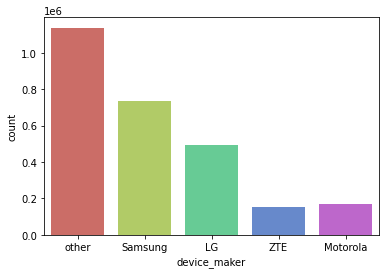

In [30]:
sns.countplot(x='device_maker', data=train, palette='hls')

<p style="line-height:1.75;font-size:16px">
'device_model' feature most values is 'NaN' so it seems we can drop this column:

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2692110 entries, 0 to 3148818
Data columns (total 13 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   bidid          object
 1   utc_time       int64 
 2   app_id         object
 3   user_state     object
 4   user_isp       object
 5   device_maker   object
 6   device_model   object
 7   device_osv     object
 8   device_height  int64 
 9   device_width   int64 
 10  click          int64 
 11  time_zone      object
 12  local_time     object
dtypes: int64(4), object(9)
memory usage: 287.5+ MB


<p style="line-height:1.75;font-size:16px">
Now we can drop the 'bidid' column since Index is also unique.<br>
Also we can reorder the columns 'device_height' and 'device_width' as one column named 'device_size'.<br>
We can drop the 'user_state', 'time_zone' and 'utc_time' columns.<br>
We can drop 'device_model' column, most of the values are NaN.

In [32]:
train['device_size'] = train['device_height'] * train['device_width']
train.drop(['bidid', 'device_height', 'device_width', 'user_state', 'time_zone', 'utc_time', 'device_model'], axis=1, inplace=True)
train.sample(4)

<ipython-input-32-6e175e4f2f8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_size'] = train['device_height'] * train['device_width']
C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,app_id,user_isp,device_maker,device_osv,click,local_time,device_size
2564206,com.EvolutionOfGames.EvolutionOfSpecies,Spectrum,Motorola,7.0,0,2018-10-13 15:45:19.736000-07:00,3686400
782028,com.APPATRIX.GirlsCarRacing.winter,Suddenlink Communications,other,7.1.1,0,2018-10-18 07:31:50.153000-05:00,409920
1441367,com.blackcircleapps.halloweenbingo,Consolidated Communications,ZTE,7.1.1,0,2018-10-03 23:21:21.424000-05:00,2073600
1340039,com.ldw.virtualfamilies2,AT&T U-verse,other,8.0.0,0,2018-08-21 23:48:02.994000-07:00,921600


<p style="line-height:1.75;font-size:16px">
Lets look a bit on column named 'user_isp':

In [33]:
print(train.user_isp.value_counts(dropna=False))

T-Mobile USA                                        612604
Spectrum                                            326911
Comcast Cable                                       288505
AT&T Wireless                                       283737
Verizon Wireless                                    240321
                                                     ...  
ESPN                                                     1
Blue Shield of California                                1
Emerging Markets Communications Deutschland GmbH         1
Access One                                               1
Mercy Health System                                      1
Name: user_isp, Length: 3381, dtype: int64


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2692110 entries, 0 to 3148818
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   app_id        object
 1   user_isp      object
 2   device_maker  object
 3   device_osv    object
 4   click         int64 
 5   local_time    object
 6   device_size   int64 
dtypes: int64(2), object(5)
memory usage: 164.3+ MB


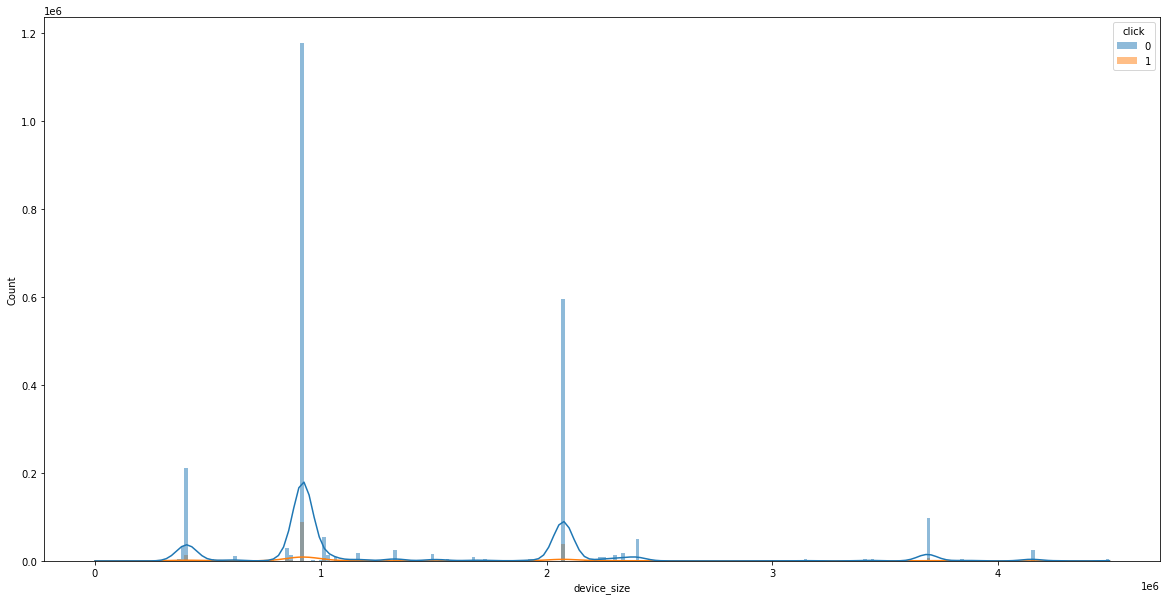

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=train, x='device_size', hue='click', stat='count', edgecolor=None, kde=True)
plt.show()

In [36]:
train['device_size_bigger_1.5'] = train['device_size'].apply(lambda size : 1 if size > 1.5 else 0)
train.drop(['device_size'], axis=1, inplace=True)

<ipython-input-36-96e7138a25ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_size_bigger_1.5'] = train['device_size'].apply(lambda size : 1 if size > 1.5 else 0)
C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
train.head()

,app_id,user_isp,device_maker,device_osv,click,local_time,device_size_bigger_1.5
0,com.OppanaGames.CarSim,AT&T Wireless,other,7.0,0,2018-09-08 17:05:31.894000-05:00,1
1,com.mobilityware.CrownSolitaire,T-Mobile USA,other,7.0,0,2018-09-08 17:06:03.932000-05:00,1
2,com.kuttigames.tenkyurollball,AT&T Wireless,other,7.1.1,0,2018-09-08 17:06:26.908000-05:00,1
3,com.trendactionfree.call_of_sniper_duty_frontl...,Comcast Cable,other,6.0.1,0,2018-09-08 17:06:45.023000-05:00,1
4,com.landslab.my3rdgrademathgames,AT&T U-verse,other,7.1.1,0,2018-09-08 18:07:23.458000-04:00,1


<p style="line-height:1.75;font-size:16px">
Lets plot if data is imbalanced (we already know it is):

<AxesSubplot:xlabel='click', ylabel='count'>

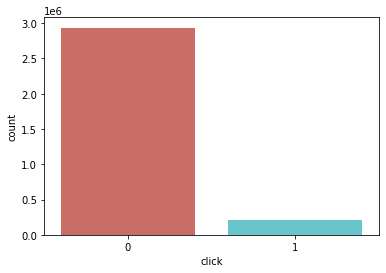

In [38]:
sns.countplot(x='click', data=data, palette='hls')

<p style="line-height:1.75;font-size:16px">
Pull up applications data from zip files:

learn the zip api:

In [39]:
from zipfile import ZipFile
import pickle

app_details = ZipFile("data/play_apps.zip")
app_file = 'play_apps/a008.com.fc2.blog.androidkaihatu.datecamera2'
app = pickle.loads(app_details.read(app_file))
app['app_id'], app['category'], app['score']

('a008.com.fc2.blog.androidkaihatu.datecamera2', ['PHOTOGRAPHY'], '4.0')

In [40]:
apps = data['app_id'].unique().tolist()
len(apps)

14869

Trying to apply the app values for each row in train data but it takes too long:

In [41]:
'''
### THIS IS TAKING TOO LONG ###
columns = ['app_id','category','score','reviews','editors_choice','free']

count = 0
for index, row in train.iterrows():
    try:
        app = pickle.loads(app_details.read('play_apps/' + row['app_id']))
        if row['app_id'] != app['app_id']:
            continue
        else:
            for c in columns:
                row[c] = app[c]
            # if there is more than one category, leave one only
            row['category'] = row['category'][0]
            count += 1
    except:
        for c in columns:
                row[c] = None

print(count)
train
'''

"\n### THIS IS TAKING TOO LONG ###\ncolumns = ['app_id','category','score','reviews','editors_choice','free']\n\ncount = 0\nfor index, row in train.iterrows():\n    try:\n        app = pickle.loads(app_details.read('play_apps/' + row['app_id']))\n        if row['app_id'] != app['app_id']:\n            continue\n        else:\n            for c in columns:\n                row[c] = app[c]\n            # if there is more than one category, leave one only\n            row['category'] = row['category'][0]\n            count += 1\n    except:\n        for c in columns:\n                row[c] = None\n\nprint(count)\ntrain\n"

In [42]:
columns = ['app_id','category','score','reviews','editors_choice','free']

In [43]:
def get_app_data(app_name):
    row = {}
    try:
        app = pickle.loads(app_details.read('play_apps/' + app_name))
        for c in columns:
            row[c] = app[c]
        # if there is more than one category, leave one only
        row['category'] = row['category'][0]
    except:
        for c in columns:
                row[c] = 'None'
    return row

In [44]:
get_app_data('com.OppanaGames.CarSim')

{'app_id': 'com.OppanaGames.CarSim',
 'category': 'GAME_SIMULATION',
 'score': '4.3',
 'reviews': 155129,
 'editors_choice': False,
 'free': True}

In [45]:
apps_list = []
for app in apps:
    apps_list.append(get_app_data(app))

apps_list

[{'app_id': 'com.OppanaGames.CarSim',
  'category': 'GAME_SIMULATION',
  'score': '4.3',
  'reviews': 155129,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.mobilityware.CrownSolitaire',
  'category': 'GAME_CARD',
  'score': '4.7',
  'reviews': 11927,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.kuttigames.tenkyurollball',
  'category': 'GAME_ARCADE',
  'score': '4.1',
  'reviews': 178,
  'editors_choice': False,
  'free': True},
 {'app_id': 'None',
  'category': 'None',
  'score': 'None',
  'reviews': 'None',
  'editors_choice': 'None',
  'free': 'None'},
 {'app_id': 'com.landslab.my3rdgrademathgames',
  'category': 'GAME_EDUCATIONAL',
  'score': '3.6',
  'reviews': 35,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.kick.trucks.manual.shift.driving',
  'category': 'GAME_SIMULATION',
  'score': '3.6',
  'reviews': 3891,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.slots.realvegas2',
  'category': 'GAME_CASINO',
  'score': '4.7

In [46]:
apps_df = pd.DataFrame(apps_list)
apps_df

,app_id,category,score,reviews,editors_choice,free
0,com.OppanaGames.CarSim,GAME_SIMULATION,4.3,155129,False,True
1,com.mobilityware.CrownSolitaire,GAME_CARD,4.7,11927,False,True
2,com.kuttigames.tenkyurollball,GAME_ARCADE,4.1,178,False,True
3,None,None,None,None,None,None
4,com.landslab.my3rdgrademathgames,GAME_EDUCATIONAL,3.6,35,False,True
...,...,...,...,...,...,...
14864,None,None,None,None,None,None
14865,None,None,None,None,None,None
14866,None,None,None,None,None,None
14867,None,None,None,None,None,None


In [47]:
train.set_index('app_id',inplace=True)
apps_df.set_index('app_id',inplace=True)

train = train.join(apps_df)

In [48]:
train.reset_index(inplace=True)
train.head()

,app_id,user_isp,device_maker,device_osv,click,local_time,device_size_bigger_1.5,category,score,reviews,editors_choice,free
0,Ibtikar.Applications.Ibaloot,T-Mobile USA,Samsung,8.0.0,0,2018-10-14 12:02:11.214000-04:00,1,GAME_CARD,4.0,53660,False,True
1,Ibtikar.Applications.Ibaloot,Madgenius.com,Samsung,7.0,0,2018-09-20 08:01:05.440000-05:00,1,GAME_CARD,4.0,53660,False,True
2,Ibtikar.Applications.Ibaloot,AT&T Wireless,other,8.0.0,0,2018-08-17 01:13:32.953000-04:00,1,GAME_CARD,4.0,53660,False,True
3,Ibtikar.Applications.Ibaloot,EGIHosting,other,7.0,0,2018-08-28 12:45:35.421000-07:00,1,GAME_CARD,4.0,53660,False,True
4,abc.FeetlyDash,Optimum Online,other,7.1.1,0,2018-08-18 07:59:48.022000-04:00,1,NaN,NaN,NaN,NaN,NaN


In [49]:
train.isna().sum()

app_id                         0
user_isp                      39
device_maker                   0
device_osv                     0
click                          0
local_time                     0
device_size_bigger_1.5         0
category                  231608
score                     236425
reviews                   231608
editors_choice            231608
free                      231608
dtype: int64

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692110 entries, 0 to 2692109
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   app_id                  object
 1   user_isp                object
 2   device_maker            object
 3   device_osv              object
 4   click                   int64 
 5   local_time              object
 6   device_size_bigger_1.5  int64 
 7   category                object
 8   score                   object
 9   reviews                 object
 10  editors_choice          object
 11  free                    object
dtypes: int64(2), object(10)
memory usage: 246.5+ MB


In [51]:
train.drop(['user_isp'], axis=1, inplace=True)

train.category.fillna('other', inplace=True)

train.score.fillna(0, inplace=True)
train.score = train.score.astype(float)

train.reviews.fillna(0, inplace=True)
train.reviews = train.reviews.astype(float)

train.editors_choice.fillna(False, inplace=True)
train.editors_choice = train.editors_choice.astype(int)

train.free.fillna(False, inplace=True)
train.free = train.free.astype(int)

In [52]:
train.isna().sum()

app_id                    0
device_maker              0
device_osv                0
click                     0
local_time                0
device_size_bigger_1.5    0
category                  0
score                     0
reviews                   0
editors_choice            0
free                      0
dtype: int64

In [53]:
train['month'] = train.apply(lambda row: row.local_time.month, axis = 1)
train['hour'] = train.apply(lambda row: row.local_time.hour, axis = 1)
train['weekday'] = train.apply(lambda row: row.local_time.strftime('%w'), axis = 1)

train.drop(['local_time'], axis=1, inplace=True)

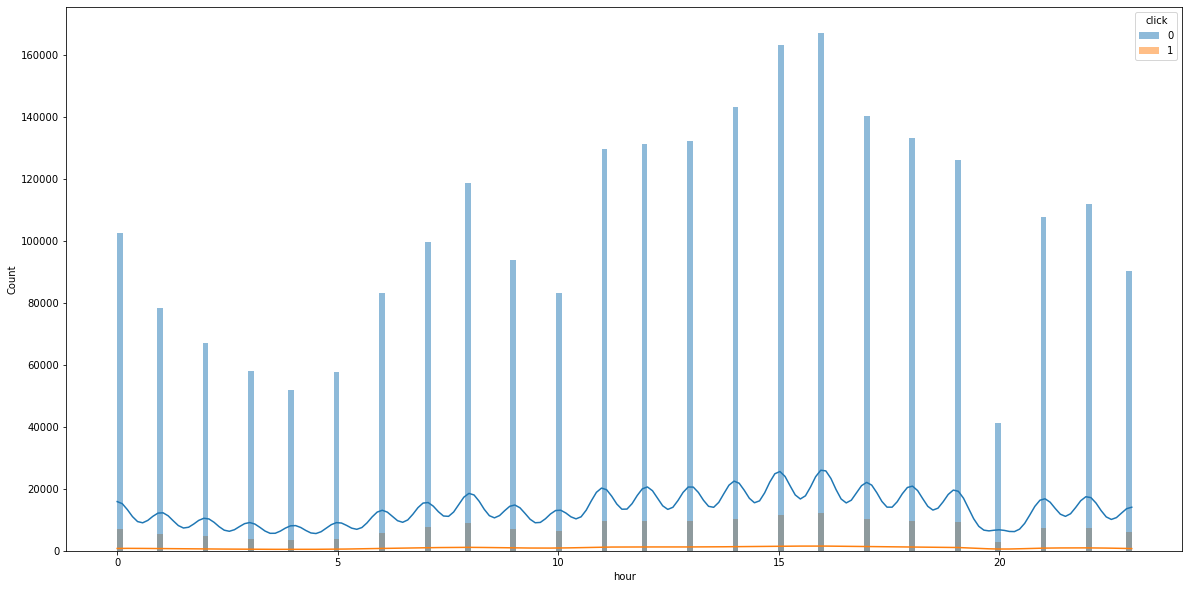

In [54]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=train, x='hour', hue='click', stat='count', edgecolor=None, kde=True)
plt.show()

In [55]:
[train[train.click == 1].click.value_counts().values[0], train[train.click == 0].click.value_counts().values[0]]

[180183, 2511927]

<AxesSubplot:>

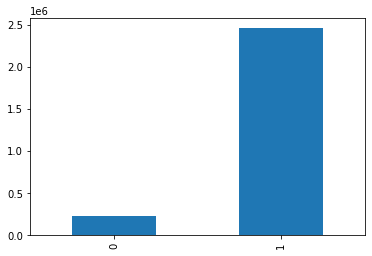

In [56]:
train.free.value_counts().sort_values().plot(kind = 'bar')

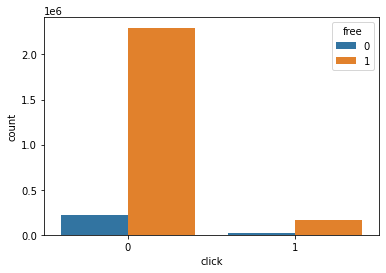

In [57]:
sns.countplot(x ='click', hue = "free", data = train)
 
# Show the plot
plt.show()

In [58]:
train.category.value_counts(dropna=False)

GAME_CARD              385605
GAME_PUZZLE            299616
GAME_ACTION            257231
GAME_CASINO            245771
GAME_ARCADE            242876
other                  231608
GAME_SIMULATION        209716
GAME_CASUAL            182348
GAME_BOARD             116736
GAME_RACING            101258
GAME_WORD               93714
GAME_ADVENTURE          58179
GAME_SPORTS             53368
GAME_ROLE_PLAYING       52128
GAME_EDUCATIONAL        36508
ENTERTAINMENT           32599
GAME_STRATEGY           18309
EDUCATION               15745
PERSONALIZATION         15574
GAME_TRIVIA              6355
MUSIC_AND_AUDIO          6330
LIBRARIES_AND_DEMO       4089
PRODUCTIVITY             3765
TOOLS                    3714
GAME_MUSIC               3649
SOCIAL                   3477
COMICS                   2089
AUTO_AND_VEHICLES        1805
SPORTS                   1500
PHOTOGRAPHY              1297
LIFESTYLE                 846
BOOKS_AND_REFERENCE       737
BEAUTY                    717
ART_AND_DE

In [59]:
train['category'].loc[train['category'].value_counts()[train['category']].values < 2000] = 'other'

C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [60]:
train.category.value_counts(dropna=False)

GAME_CARD             385605
GAME_PUZZLE           299616
GAME_ACTION           257231
GAME_CASINO           245771
GAME_ARCADE           242876
other                 241361
GAME_SIMULATION       209716
GAME_CASUAL           182348
GAME_BOARD            116736
GAME_RACING           101258
GAME_WORD              93714
GAME_ADVENTURE         58179
GAME_SPORTS            53368
GAME_ROLE_PLAYING      52128
GAME_EDUCATIONAL       36508
ENTERTAINMENT          32599
GAME_STRATEGY          18309
EDUCATION              15745
PERSONALIZATION        15574
GAME_TRIVIA             6355
MUSIC_AND_AUDIO         6330
LIBRARIES_AND_DEMO      4089
PRODUCTIVITY            3765
TOOLS                   3714
GAME_MUSIC              3649
SOCIAL                  3477
COMICS                  2089
Name: category, dtype: int64

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692110 entries, 0 to 2692109
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   app_id                  object 
 1   device_maker            object 
 2   device_osv              object 
 3   click                   int64  
 4   device_size_bigger_1.5  int64  
 5   category                object 
 6   score                   float64
 7   reviews                 float64
 8   editors_choice          int32  
 9   free                    int32  
 10  month                   int64  
 11  hour                    int64  
 12  weekday                 object 
dtypes: float64(2), int32(2), int64(4), object(5)
memory usage: 246.5+ MB


In [62]:
train.device_osv.value_counts(dropna=False)

7.0                                             921321
8.0.0                                           544845
6.0.1                                           465716
7.1.1                                           464410
7.1.2                                           150409
8.1.0                                            70594
6.0                                              55277
9                                                19433
7.1                                                 59
P                                                   20
8.0                                                  7
CONTIXO-LA703-20180915-v1.0                          5
6.1                                                  5
M                                                    4
5.0 by mrkindaiji                                    2
unknown                                              1
4.4.4 KitKat Os For 9inch QuadCore Tablet Pc         1
7.0.1                                                1
Name: devi

In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['device_osv'])
train['device_osv'] = le.transform(train['device_osv'])

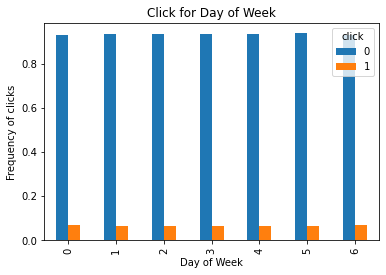

In [64]:
pd.crosstab(train.weekday, train.click).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Click for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of clicks')
plt.show()

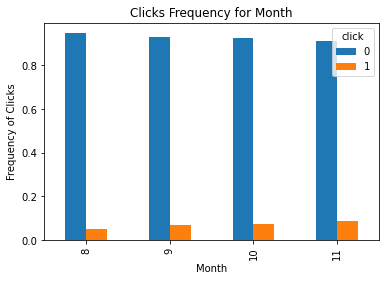

In [65]:
pd.crosstab(train.month, train.click).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Clicks Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Clicks')
plt.show()

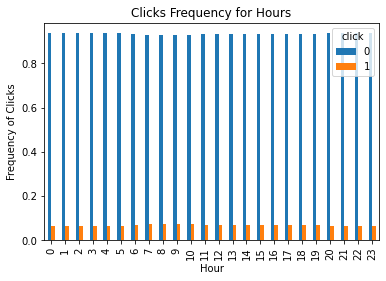

In [66]:
pd.crosstab(train.hour, train.click).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Clicks Frequency for Hours')
plt.xlabel('Hour')
plt.ylabel('Frequency of Clicks')
plt.show()

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692110 entries, 0 to 2692109
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   app_id                  object 
 1   device_maker            object 
 2   device_osv              int32  
 3   click                   int64  
 4   device_size_bigger_1.5  int64  
 5   category                object 
 6   score                   float64
 7   reviews                 float64
 8   editors_choice          int32  
 9   free                    int32  
 10  month                   int64  
 11  hour                    int64  
 12  weekday                 object 
dtypes: float64(2), int32(3), int64(4), object(4)
memory usage: 236.2+ MB


In [68]:
train.drop(['app_id', 'month', 'hour', 'weekday'], axis=1, inplace=True)

In [69]:
from sklearn.preprocessing import RobustScaler
 
scaler = RobustScaler()
cols = ['reviews', 'score']
train[cols] = scaler.fit_transform(train[cols])

In [70]:
cat_vars = ['device_maker', 'category']
train = pd.concat([train.drop(cat_vars, axis=1), pd.get_dummies(train[cat_vars])], axis=1)

In [71]:
X_train = train.drop('click', axis=1)
y_train = train['click']

In [72]:
columns = ['app_id','category','score','reviews','editors_choice','free']

apps_list = []
for app in apps:
    apps_list.append(get_app_data(app))
apps_df = pd.DataFrame(apps_list)

test.set_index('app_id',inplace=True)
apps_df.set_index('app_id',inplace=True)

apps_df

,category,score,reviews,editors_choice,free
app_id,,,,,
com.OppanaGames.CarSim,GAME_SIMULATION,4.3,155129,False,True
com.mobilityware.CrownSolitaire,GAME_CARD,4.7,11927,False,True
com.kuttigames.tenkyurollball,GAME_ARCADE,4.1,178,False,True
None,None,None,None,None,None
com.landslab.my3rdgrademathgames,GAME_EDUCATIONAL,3.6,35,False,True
...,...,...,...,...,...
None,None,None,None,None,None
None,None,None,None,None,None
None,None,None,None,None,None


In [73]:
# device_maker
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='other')
test['device_maker'] = imp.fit_transform(test['device_maker'].values.reshape(-1,1))
test['device_maker'].loc[test['device_maker'].value_counts()[test['device_maker']].values < 60000] = 'other'

# device_size
test['device_size'] = test['device_height'] * test['device_width']
test['device_size_bigger_1.5'] = test['device_size'].apply(lambda size : 1 if size > 1.5 else 0)

# add data from zip files
test = test.join(apps_df)
test.reset_index(inplace=True)

<ipython-input-73-54ad98c7c1fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['device_maker'] = imp.fit_transform(test['device_maker'].values.reshape(-1,1))
C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-73-54ad98c7c1fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [74]:
# category
test.category.fillna('other', inplace=True)
test['category'].loc[test['category'].value_counts()[test['category']].values < 2000] = 'other'

# editor_choice
test.editors_choice.fillna(False, inplace=True)
test.editors_choice = test.editors_choice.astype(int)

# free
test.free.fillna(False, inplace=True)
test.free = test.free.astype(int)

# device_osv encoding
le = LabelEncoder()
le.fit(test['device_osv'])
test['device_osv'] = le.transform(test['device_osv'])

test

,app_id,bidid,utc_time,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,click,time_zone,local_time,device_size,device_size_bigger_1.5,category,score,reviews,editors_choice,free
0,abc.kids.preschool.learning.phonics.songs.videos,46637dbe-22c0-4a9e-a858-9eb355dd773e,1541356997801,MS,CSpire Wireless,LG,AS998,4,1440,2880,1,America/Chicago,2018-11-04 12:43:17.801000-06:00,4147200,1,EDUCATION,4.4,1371,0,1
1,abc.kids.preschool.learning.phonics.songs.videos,46637dbe-22c0-4a9e-a858-9eb355dd773e,1541356824978,MS,CSpire Wireless,LG,AS998,4,1440,2880,0,America/Chicago,2018-11-04 12:40:24.978000-06:00,4147200,1,EDUCATION,4.4,1371,0,1
2,abc.kids.preschool.learning.phonics.songs.videos,5dcbd3cf-4e75-425e-b1d7-6f8c77779d33,1542248281587,TX,T-Mobile USA,other,A574BL,3,480,854,0,America/Chicago,2018-11-14 20:18:01.587000-06:00,409920,1,EDUCATION,4.4,1371,0,1
3,abc.kids.preschool.learning.phonics.songs.videos,f372410c-3679-4735-8937-cdfcb8439e26,1542258853122,IL,Sprint PCS,Samsung,SM-J727P,2,720,1280,0,America/Chicago,2018-11-14 23:14:13.122000-06:00,921600,1,EDUCATION,4.4,1371,0,1
4,abc.kids.preschool.learning.phonics.songs.videos,5d3e5037-1f9c-4164-98ad-255990304e7c,1541696587641,IL,AT&T Wireless,LG,LM-X210(G),4,1280,720,0,America/Chicago,2018-11-08 11:03:07.641000-06:00,921600,1,EDUCATION,4.4,1371,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456713,zaycev.fm,1031fe85-6050-4d03-a505-8726e13003c3,1541949845672,WI,Verizon Wireless,Samsung,SM-G928V,2,1920,1080,0,America/Chicago,2018-11-11 09:24:05.672000-06:00,2073600,1,other,4.5,21618,0,1
456714,zaycev.fm,49c987ef-3521-40a8-baa2-51057ba7b6aa,1541457484811,MN,T-Mobile USA,LG,H901,2,2560,1440,0,America/Chicago,2018-11-05 16:38:04.811000-06:00,3686400,1,other,4.5,21618,0,1
456715,zaycev.fm,79daab48-5d41-46e6-ad63-e6ddaa9f05c0,1542204652158,NY,Sprint PCS,Samsung,SM-G935P,6,1920,1080,0,America/New_York,2018-11-14 09:10:52.158000-05:00,2073600,1,other,4.5,21618,0,1
456716,zebi24.guess_5,3b9565c0-96f3-4d6d-8975-32b3667eeea1,1541096622211,MD,Verizon Wireless,LG,L84VL,4,1280,720,0,America/New_York,2018-11-01 14:23:42.211000-04:00,921600,1,other,4.1,969,0,1


In [75]:
# score
test.score.fillna(0, inplace=True)
test.score = test.score.astype(float)

# reviews
test.reviews.fillna(0, inplace=True)
test.reviews = test.reviews.astype(float)

# scaling
cols = ['reviews', 'score']
test[cols] = scaler.fit_transform(test[cols])

# get_dummies
cat_vars = ['device_maker', 'category']
test = pd.concat([test.drop(cat_vars, axis=1), pd.get_dummies(test[cat_vars])], axis=1)

In [76]:
test.drop(['device_size', 'bidid', 'device_height', 'device_width', 'user_state', 'time_zone', 'utc_time', 'device_model','user_isp','local_time','app_id'], axis=1, inplace=True)

In [77]:
X_train = train.drop('click', axis=1)
y_train = train['click']

X_test = test.drop('click', axis=1)
y_test = test['click']

In [78]:
X_train

,device_osv,device_size_bigger_1.5,score,reviews,editors_choice,free,device_maker_LG,device_maker_Motorola,device_maker_Samsung,device_maker_ZTE,...,category_GAME_STRATEGY,category_GAME_TRIVIA,category_GAME_WORD,category_LIBRARIES_AND_DEMO,category_MUSIC_AND_AUDIO,category_PERSONALIZATION,category_PRODUCTIVITY,category_SOCIAL,category_TOOLS,category_other
0,11,1,-1.00,0.221154,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,-1.00,0.221154,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,11,1,-1.00,0.221154,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1,-1.00,0.221154,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,1,-11.00,-0.224091,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692105,8,1,-11.00,-0.224091,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2692106,5,1,-11.00,-0.224091,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2692107,5,1,-11.00,-0.224091,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2692108,8,1,-11.00,-0.224091,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [79]:
X_test

,device_osv,device_size_bigger_1.5,score,reviews,editors_choice,free,device_maker_LG,device_maker_Samsung,device_maker_other,category_EDUCATION,...,category_GAME_MUSIC,category_GAME_PUZZLE,category_GAME_RACING,category_GAME_ROLE_PLAYING,category_GAME_SIMULATION,category_GAME_SPORTS,category_GAME_STRATEGY,category_GAME_WORD,category_LIBRARIES_AND_DEMO,category_other
0,4,1,0.285714,-0.127704,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4,1,0.285714,-0.127704,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0.285714,-0.127704,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0.285714,-0.127704,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0.285714,-0.127704,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456713,2,1,0.428571,0.375140,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
456714,2,1,0.428571,0.375140,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
456715,6,1,0.428571,0.375140,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
456716,4,1,-0.142857,-0.137688,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
diff = list(set(X_train.columns) - set(X_test.columns))
diff

['category_MUSIC_AND_AUDIO',
 'category_COMICS',
 'device_maker_Motorola',
 'device_maker_ZTE',
 'category_GAME_TRIVIA',
 'category_TOOLS',
 'category_PRODUCTIVITY',
 'category_SOCIAL',
 'category_PERSONALIZATION']

In [81]:
for category in diff:
    X_test[category] = 0

In [82]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

def show_classifier_results(clf):
    y_pred = clf.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f'Precision score: {precision_score(y_test, y_pred)}')
    print(f'Recall score: {recall_score(y_test, y_pred)}')

In [83]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [84]:
show_classifier_results(lr)

[[423702      0]
 [ 33016      0]]


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96    423702
           1       0.00      0.00      0.00     33016

    accuracy                           0.93    456718
   macro avg       0.46      0.50      0.48    456718
weighted avg       0.86      0.93      0.89    456718

Precision score: 0.0
Recall score: 0.0


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
lrmc = LogisticRegression(multi_class='multinomial', max_iter=1000)
lrmc.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [86]:
show_classifier_results(lrmc)

[[423702      0]
 [ 33016      0]]


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96    423702
           1       0.00      0.00      0.00     33016

    accuracy                           0.93    456718
   macro avg       0.46      0.50      0.48    456718
weighted avg       0.86      0.93      0.89    456718

Precision score: 0.0
Recall score: 0.0


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [88]:
show_classifier_results(dtc)

[[423702      0]
 [ 33016      0]]


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96    423702
           1       0.00      0.00      0.00     33016

    accuracy                           0.93    456718
   macro avg       0.46      0.50      0.48    456718
weighted avg       0.86      0.93      0.89    456718

Precision score: 0.0
Recall score: 0.0


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
show_classifier_results(dtc)

[[423702      0]
 [ 33016      0]]


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96    423702
           1       0.00      0.00      0.00     33016

    accuracy                           0.93    456718
   macro avg       0.46      0.50      0.48    456718
weighted avg       0.86      0.93      0.89    456718

Precision score: 0.0
Recall score: 0.0


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [91]:
show_classifier_results(dtc)

[[423702      0]
 [ 33016      0]]


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96    423702
           1       0.00      0.00      0.00     33016

    accuracy                           0.93    456718
   macro avg       0.46      0.50      0.48    456718
weighted avg       0.86      0.93      0.89    456718

Precision score: 0.0
Recall score: 0.0


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
from sklearn.feature_selection import RFE

rfe_selector = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30, step=10, verbose=5)
rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_features = X_train.loc[:, rfe_support].columns.tolist()
rfe_features

Fitting estimator with 38 features.


['device_osv',
 'score',
 'reviews',
 'editors_choice',
 'free',
 'device_maker_LG',
 'device_maker_Motorola',
 'device_maker_Samsung',
 'device_maker_ZTE',
 'device_maker_other',
 'category_EDUCATION',
 'category_ENTERTAINMENT',
 'category_GAME_ACTION',
 'category_GAME_ADVENTURE',
 'category_GAME_ARCADE',
 'category_GAME_BOARD',
 'category_GAME_CARD',
 'category_GAME_CASINO',
 'category_GAME_CASUAL',
 'category_GAME_EDUCATIONAL',
 'category_GAME_MUSIC',
 'category_GAME_PUZZLE',
 'category_GAME_RACING',
 'category_GAME_ROLE_PLAYING',
 'category_GAME_SIMULATION',
 'category_GAME_SPORTS',
 'category_GAME_STRATEGY',
 'category_GAME_WORD',
 'category_PERSONALIZATION',
 'category_other']

In [93]:
rfe = DecisionTreeClassifier(random_state=0)
rfe.fit(X_train[rfe_features],y_train)

DecisionTreeClassifier(random_state=0)

In [94]:
y_pred = rfe.predict(X_test[rfe_features])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Precision score: {precision_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')

[[423302    400]
 [ 32989     27]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    423702
           1       0.06      0.00      0.00     33016

    accuracy                           0.93    456718
   macro avg       0.50      0.50      0.48    456718
weighted avg       0.87      0.93      0.89    456718

Precision score: 0.06323185011709602
Recall score: 0.0008177853162103223


In [95]:
rfe_selector = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=50, step=10)
rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_features = X_train.loc[:, rfe_support].columns.tolist()

rfe_50 = DecisionTreeClassifier(random_state=0)

rfe_50.fit(X_train[rfe_features],y_train)

DecisionTreeClassifier(random_state=0)

In [96]:
y_pred = rfe_50.predict(X_test[rfe_features])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Precision score: {precision_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')

[[423319    383]
 [ 32990     26]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    423702
           1       0.06      0.00      0.00     33016

    accuracy                           0.93    456718
   macro avg       0.50      0.50      0.48    456718
weighted avg       0.87      0.93      0.89    456718

Precision score: 0.06356968215158924
Recall score: 0.0007874969711654955


In [97]:
for weight in [1, 10, 100, 1000]:
    # fit a model
    dtc_w = DecisionTreeClassifier(class_weight={0:1, 1: weight})
    dtc_w.fit(X_train, y_train)

    print(f'Weight: {weight}\n')
    
    show_classifier_results(dtc_w)       

Weight: 1

[[423702      0]
 [ 33016      0]]


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96    423702
           1       0.00      0.00      0.00     33016

    accuracy                           0.93    456718
   macro avg       0.46      0.50      0.48    456718
weighted avg       0.86      0.93      0.89    456718

Precision score: 0.0


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score: 0.0
Weight: 10

[[304864 118838]
 [ 23859   9157]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81    423702
           1       0.07      0.28      0.11     33016

    accuracy                           0.69    456718
   macro avg       0.50      0.50      0.46    456718
weighted avg       0.87      0.69      0.76    456718

Precision score: 0.07154185710379311
Recall score: 0.27735037557547854
Weight: 100

[[264724 158978]
 [ 20770  12246]]
              precision    recall  f1-score   support

           0       0.93      0.62      0.75    423702
           1       0.07      0.37      0.12     33016

    accuracy                           0.61    456718
   macro avg       0.50      0.50      0.43    456718
weighted avg       0.87      0.61      0.70    456718

Precision score: 0.07152034761482035
Recall score: 0.3709110734189484
Weight: 1000

[[286701 137001]
 [ 22270  10746]]
              precision    recall  f1-score

In [98]:
lr_w = LogisticRegression(class_weight='balanced')
lr_w.fit(X_train, y_train)

show_classifier_results(lr_w)  

C:\Users\main_user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[104562 319140]
 [ 10216  22800]]
              precision    recall  f1-score   support

           0       0.91      0.25      0.39    423702
           1       0.07      0.69      0.12     33016

    accuracy                           0.28    456718
   macro avg       0.49      0.47      0.25    456718
weighted avg       0.85      0.28      0.37    456718

Precision score: 0.06667836462537287
Recall score: 0.6905742670220499


In [99]:
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train, y_train)

show_classifier_results(model)    

[[288657 135045]
 [ 22690  10326]]
              precision    recall  f1-score   support

           0       0.93      0.68      0.79    423702
           1       0.07      0.31      0.12     33016

    accuracy                           0.65    456718
   macro avg       0.50      0.50      0.45    456718
weighted avg       0.87      0.65      0.74    456718

Precision score: 0.07103204903316342
Recall score: 0.31275745093288104


In [101]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=3, class_weight='balanced')
rf.fit(X_train, y_train)

show_classifier_results(rf) 

[[172606 251096]
 [ 13953  19063]]
              precision    recall  f1-score   support

           0       0.93      0.41      0.57    423702
           1       0.07      0.58      0.13     33016

    accuracy                           0.42    456718
   macro avg       0.50      0.49      0.35    456718
weighted avg       0.86      0.42      0.53    456718

Precision score: 0.07056215043733505
Recall score: 0.5773867215895323


In [106]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': range(4, 200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': range(4, 30),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': range(4, 10),
    'max_depth': range(3, 10)
}

# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 10 models over 5 folds of cross validation (50 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=10, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 10 candidates
rscv = clf.fit(X_train, y_train)

# print winning set of hyperparameters
pprint(rscv.best_estimator_.get_params())

KeyboardInterrupt: 

In [ ]:
show_classifier_results(rscv)

In [100]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Random Oversampling
oversampler = RandomOverSampler(sampling_strategy='minority')
X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

# SMOTE Oversampling
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

for X, y, method in [(X_oversampled, y_oversampled, 'Oversampling'), 
                     (X_smote, y_smote, 'SMOTE'), 
                     (X_undersampled, y_undersampled, 'Undersampling')]:
    clf = RandomForestClassifier(n_estimators=100, max_depth=5)
    clf.fit(X, y)
    print(f'Method: {method}')
    show_classifier_results(clf)
    print("="*25)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
!aws s3 cp /home/ubuntu/notebooks/intro_to_ml/day_6/"Final Project-yhenig".ipynb s3://uatt-e2-yhenig/intro_to_ml/project1